In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../kofio_dataset/kofio_dataset.csv',sep='\t')

## Insight on our dataset

In [3]:
df.head(20)

,Item Name,Roastery,Roast Level,Region,Flavour Profile,Roast Type,Process,Variety,Brewing Method,Coffee Origin,Rating,Recommended,Price
0,Ethiopia Jenny's BARREL COFFEE - maturing in w...,The naughty dog,Omni,Agaro - Jimma,"Chocolate,Caramel,Forest fruit,Whiskey",Omni (recommended for both Filter & Espresso C...,Washed,"74110,74112,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,4.5,96%,"14,99"
1,Rwanda KIRAMBO,The naughty dog,Omni,Nyamasheke District,"Milk chocolate,Blueberries,Mulled wine,Lemon m...",Omni (recommended for both Filter & Espresso C...,Natural,Red Bourbon,"Aeropress,Chemex,Clever dripper,French Press,H...",Rwanda,4.4,100%,"11,99"
2,Ethiopia SUKE QUTO - washed 1000g,The naughty dog,Light to Medium Light,Guji,"Bergamot,Peach ice tea,Black tea,Flowers",Filter,Washed,Heirloom,"Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,NaN,NaN,"49,99"
3,Ethiopia Jenny's BARREL COFFEE - 1000g,The naughty dog,Omni,Agaro - Jimma,"Chocolate,Caramel,Forest fruit,Whiskey",Omni (recommended for both Filter & Espresso C...,Washed,"74110,74112,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,4.5,96%,"54,99"
4,Ethiopia GORAA,The naughty dog,Light to Medium Light,Guji,"Peach tea,Květinový med,Milk chocolate",Filter,Natural,"74110,74112,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,NaN,NaN,"11,99"
5,Ethiopia MALAWO - black honey,The naughty dog,Light to Medium Light,Bensa,"Peach ice tea,Jasmine,Forest strawberries,Pass...",Filter,Honey,Heirloom,"Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,5.0,100%,"12,99"
6,Kenya NGANDU,The naughty dog,Light to Medium Light,Nyeri,"Redcurrant,Maple syrup,Lime",Filter,Washed,"SL28,SL34","Aeropress,Chemex,Clever dripper,French Press,H...",Kenya,5.0,100%,"11,99"
7,Colombia BOLIVAR,The naughty dog,Light to Medium Light,Antioquia,"Caramel,Forest fruit,Rum",Filter,Natural,"Castillo,Caturra","Aeropress,Chemex,Clever dripper,French Press,H...",Colombia,4.7,100%,"11,99"
8,Ethiopia GENJI CHALLA,The naughty dog,Light to Medium Light,Jimma - Oromia,"Bergamot,Black tea,Nectarines,Orange",Filter,Washed,Heirloom,"Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia,4.3,50%,"11,99"
9,UNICORN BLEND #5,The naughty dog,Light to Medium Light,NaN,"Black tea,Květinový med,Apricots,Vanilla,Jelly",Filter,NaN,"Castillo,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...","Ethiopia,Colombia",NaN,NaN,"13,99"


In [4]:
print(df.count())
# count the number of non-empty values for each column
print("\nItems without NULL value:",df.dropna().count()[0])
# count the number of rows that have no empty values

Item Name          322
Roastery           322
Roast Level        283
Region             309
Flavour Profile    320
Roast Type         283
Process            301
Variety            241
Brewing Method     283
Coffee Origin      320
Rating             111
Recommended        111
Price              179
dtype: int64

Items without NULL value: 53


In [16]:
selected_columns = [['Rating', 'Recommended', 'Price'], ['Roast Level', 'Brewing Method', 'Flavour Profile']]
print(df[selected_columns[0]].count()[0])
# count the number of rows that have non-empty values in selected columns 
print(df[selected_columns[1]].count()[0])
print(df[selected_columns[0] + selected_columns[1]].count()[0])

111
283
111


## Data Cleaning

In [60]:
# Change the type of Price/Recommended to float/int
df['Price'] = df['Price'].str.replace(',', '.').astype(float)
df['Recommended'] = df['Recommended'].str.replace('%', '').astype(int)
df['Roast Type'] = df['Roast Type'].replace('Omni (recommended for both Filter & Espresso Coffee)', 'Omni')


### For Figure 2

In [38]:
# Data with prices, ratings and recommended
df_fig2 = df
df_fig2.dropna(subset=['Price','Rating','Recommended'], inplace=True)
df_fig2.loc[:,['Item Name', 'Roastery', 'Price', 'Rating', 'Recommended']]

,Item Name,Roastery,Price,Rating,Recommended
0,Ethiopia Jenny's BARREL COFFEE - maturing in w...,The naughty dog,14.99,4.5,96
1,Rwanda KIRAMBO,The naughty dog,11.99,4.4,100
3,Ethiopia Jenny's BARREL COFFEE - 1000g,The naughty dog,54.99,4.5,96
5,Ethiopia MALAWO - black honey,The naughty dog,12.99,5.0,100
6,Kenya NGANDU,The naughty dog,11.99,5.0,100
...,...,...,...,...,...
210,Start capsules for nespresso coffee machines -...,Doubleshot,7.49,5.0,100
211,FIFTY ESPRESSO blend,Fiftybeans,11.99,4.8,100
212,BLØND FILTER blend,Fiftybeans,11.99,4.3,100
213,FIFTY ESPRESSO blend - 1000g,Fiftybeans,34.99,4.8,100


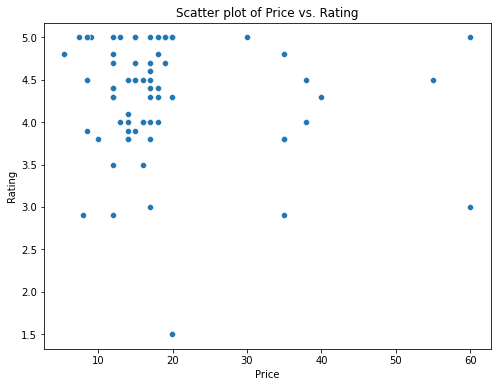

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Rating', data=df_fig2)
plt.title('Scatter plot of Price vs. Rating')
plt.show()

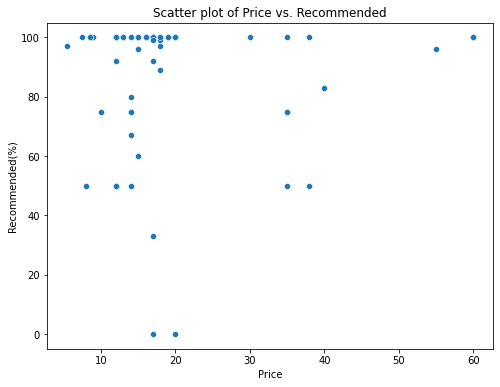

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Recommended', data=df_fig2)
plt.title('Scatter plot of Price vs. Recommended')
plt.ylabel('Recommended(%)')
plt.show()

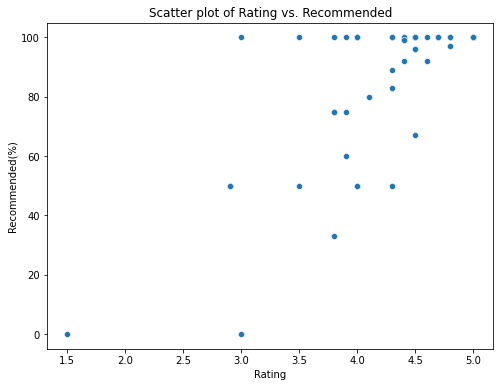

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rating', y='Recommended', data=df_fig2)
plt.title('Scatter plot of Rating vs. Recommended')
plt.ylabel('Recommended(%)')
plt.show()

Roastery
Doubleshot                   5.000000
Main Lane Coffee Roasters    5.000000
Dark Woods Coffee            4.800000
Industra Coffee              4.750000
Coffea Circulor              4.666667
DAK Coffee Roasters          4.666667
The naughty dog              4.640000
BeBerry Coffee               4.600000
Candycane Coffee             4.550000
Fiftybeans                   4.550000
Gardelli Coffee              4.540000
The Barn                     4.500000
Concept Coffee Roasters      4.400000
Morgon Coffee Roasters       4.400000
Dos Mundos                   4.225000
HAYB Speciality Coffee       4.020000
Nordbeans                    4.000000
Good Beans                   3.933333
Beansmith.s                  3.800000
Father's Coffee Roastery     3.712500
Square Mile                  3.166667
Name: Rating, dtype: float64


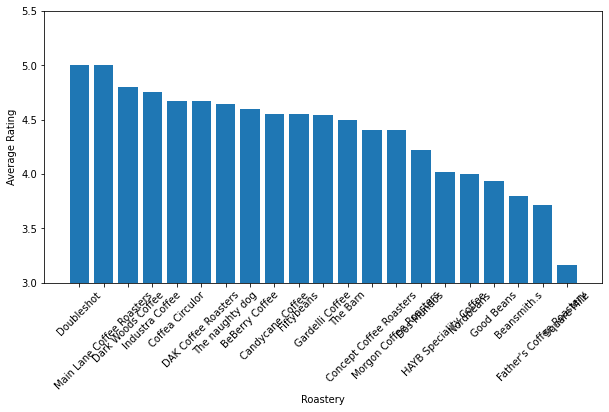

In [56]:
df_mean = df_fig2.groupby('Roastery')['Rating'].mean().sort_values(ascending=False)
print(df_mean)

plt.figure(figsize=(10, 5))
plt.bar(df_mean.index, df_mean.values)

plt.xlabel('Roastery')
plt.ylabel('Average Rating')
plt.ylim([3,5.5])
plt.xticks(rotation=45)

plt.show()

In [34]:
df_fig2.to_csv('../kofio_dataset/price_rating_rec_clean.csv',index=False)

### For Figure 3

In [80]:
df_fig3 = df.loc[:,['Item Name', 'Roastery', 'Roast Level',	'Region', 'Flavour Profile', 'Roast Type', 'Process', 'Variety', 'Brewing Method', 'Coffee Origin']]
df_fig3 = df_fig3.dropna()
df_fig3.info()
df_fig3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 214
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Item Name        53 non-null     object
 1   Roastery         53 non-null     object
 2   Roast Level      53 non-null     object
 3   Region           53 non-null     object
 4   Flavour Profile  53 non-null     object
 5   Roast Type       53 non-null     object
 6   Process          53 non-null     object
 7   Variety          53 non-null     object
 8   Brewing Method   53 non-null     object
 9   Coffee Origin    53 non-null     object
dtypes: object(10)
memory usage: 4.6+ KB


,Item Name,Roastery,Roast Level,Region,Flavour Profile,Roast Type,Process,Variety,Brewing Method,Coffee Origin
0,Ethiopia Jenny's BARREL COFFEE - maturing in w...,The naughty dog,Omni,Agaro - Jimma,"Chocolate,Caramel,Forest fruit,Whiskey",Omni,Washed,"74110,74112,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia
1,Rwanda KIRAMBO,The naughty dog,Omni,Nyamasheke District,"Milk chocolate,Blueberries,Mulled wine,Lemon m...",Omni,Natural,Red Bourbon,"Aeropress,Chemex,Clever dripper,French Press,H...",Rwanda
3,Ethiopia Jenny's BARREL COFFEE - 1000g,The naughty dog,Omni,Agaro - Jimma,"Chocolate,Caramel,Forest fruit,Whiskey",Omni,Washed,"74110,74112,Heirloom","Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia
5,Ethiopia MALAWO - black honey,The naughty dog,Light to Medium Light,Bensa,"Peach ice tea,Jasmine,Forest strawberries,Pass...",Filter,Honey,Heirloom,"Aeropress,Chemex,Clever dripper,French Press,H...",Ethiopia
6,Kenya NGANDU,The naughty dog,Light to Medium Light,Nyeri,"Redcurrant,Maple syrup,Lime",Filter,Washed,"SL28,SL34","Aeropress,Chemex,Clever dripper,French Press,H...",Kenya


In [65]:
# Count the Flavour number
flavour_lists=df_fig3['Flavour Profile'].str.split(',').tolist()
flavours = list(set([flavour for flavour_list in flavour_lists for flavour in flavour_list]))
print(f'There\'re {len(flavours)} flavours')
flavours

There're 106 flavours


['Strawberries',
 'Nectarines',
 'Cocoa nibs',
 'Red orange',
 'Rum',
 'Sugarcane',
 'Apricots',
 'Ripe cherries',
 'Green apple',
 'Apple',
 'Roses',
 'Plum jam',
 'Berry fruits',
 'Marzipan',
 'Marshmallow',
 'Cookies',
 'Pear',
 'Almond',
 'Black tea',
 'Plums',
 'Elderflower',
 'Cherry jam',
 'Dark chocolate',
 'Nuts',
 'Tangerines',
 'Peach ice tea',
 'Yellow plums',
 'Redcurrant',
 'Orange flower',
 'Dried strawberries',
 'Lilac',
 'Cinnamon',
 'Dutch cocoa',
 'Maple syrup',
 'Rambutan',
 'Peanut butter',
 'Vanilla',
 'Red fruits',
 'Hazelnut butter',
 'Liqueur Grand Marnier',
 'Gooseberry',
 'Passionflower',
 'Chocolate',
 'Gummy bears',
 'Caramel',
 'Citrus',
 'Demerara sugar',
 'Passion fruit',
 'Raisins',
 'Brown sugar',
 'Lime',
 'Dark Bitter chocolate',
 'Ice tea',
 'Lychee',
 'Ripe fruit',
 'Berries',
 'Watermelon',
 'Forest fruit',
 'Pecans',
 'Lemon marmalade',
 'Orange',
 'Guava',
 'Cherries',
 'Sedmikráska',
 'Nougat',
 'Raspberries',
 'Dried fruit',
 'Blueberries',
 '

In [81]:
brewing_lists=df_fig3['Brewing Method'].str.split(',').tolist()
methods = list(set([brewing for brewing_list in brewing_lists for brewing in brewing_list]))
print(f'There\'re {len(methods)} brewing methods')
methods

There're 8 brewing methods


['Espresso',
 'Chemex',
 'Moka pot',
 'Clever dripper',
 'French Press',
 'Vacuum Pot',
 'Hario V60',
 'Aeropress']

In [82]:
level_lists=df_fig3['Roast Level'].str.split(',').tolist()
levels = list(set([level for level_list in level_lists for level in level_list]))
print(f'There\'re {len(levels)} Roast Levels')
levels

There're 3 Roast Levels


['Omni', 'Medium to medium dark', 'Light to Medium Light']

In [ ]:
type_lists=df_fig3['Roast Type'].str.split(',').tolist()
types = list(set([type_ for type_list in type_lists for type_ in type_list]))
print(f'There\'re {len(levels)} Roast Types')
types